In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
from sklearn.decomposition import PCA
import config
from config import CONNSTRING
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
engine= create_engine(CONNSTRING)

query = "SELECT * FROM customer_data"
df = pd.read_sql(query, engine)

In [4]:
#Clustering Customers
#Step 1: Data Preprocessing
# Converting columns to appropriate data types
df['Customer ID'] = df['Customer ID'].astype(int)  # Assuming 'Customer ID' is an integer
df['age'] = df['age'].astype(int)  # Age is an integer
df['gender'] = df['gender'].astype('category')  # Gender as category
df['Item Purchased'] = df['Item Purchased'].astype('category')  # Item Purchased as category
df['category'] = df['category'].astype('category')  # Category as category
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(float)  # Purchase Amount as float
df['location'] = df['location'].astype('category')  # Location as category
df['size'] = df['size'].astype('category')  # Size as category
df['color'] = df['color'].astype('category')  # Color as category
df['season'] = df['season'].astype('category')  # Season as category
df['Review Rating'] = df['Review Rating'].astype(float)  # Review Rating as float
df['Subscription Status'] = df['Subscription Status'].astype('category')  # Subscription Status as category
df['Shipping Type'] = df['Shipping Type'].astype('category')  # Shipping Type as category
df['Discount Applied'] = df['Discount Applied'].astype('category')  # Discount Applied as category (assuming 'Yes'/'No')
df['Promo Code Used'] = df['Promo Code Used'].astype('category')  # Promo Code Used as category
df['Previous Purchases'] = df['Previous Purchases'].astype(int)  # Previous Purchases as integer
df['Payment Method'] = df['Payment Method'].astype('category')  # Payment Method as category
df['Frequency of Purchases'] = df['Frequency of Purchases'].astype('category')  # Frequency of Purchases as category

In [13]:
# Select relevant features
features_categorical = df[['gender', 'category', 'location', 'Payment Method']].copy()
features_numerical = df[['age', 'Previous Purchases','Purchase Amount (USD)']].copy()


features_encoded = pd.get_dummies(features_categorical)
features_encoded.head() 

# Concatenate numerical and encoded features
features = pd.concat([features_numerical, features_encoded], axis=1)
features.head()

,age,Previous Purchases,Purchase Amount (USD),gender_Female,gender_Male,category_Accessories,category_Clothing,category_Footwear,category_Outerwear,location_Alabama,...,location_Washington,location_West Virginia,location_Wisconsin,location_Wyoming,Payment Method_Bank Transfer,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo
0,55,14,53.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,19,2,64.0,False,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,50,23,73.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,21,49,90.0,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,45,31,49.0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [14]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

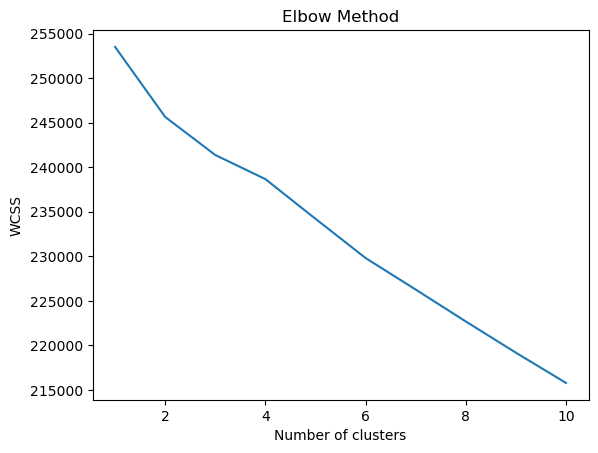

In [15]:
# ... (your previous code)

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [25]:
# Create a clustering model (example: K-Means)
kmeans = KMeans(n_clusters=3)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(features_scaled)

c:\Users\Karen\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


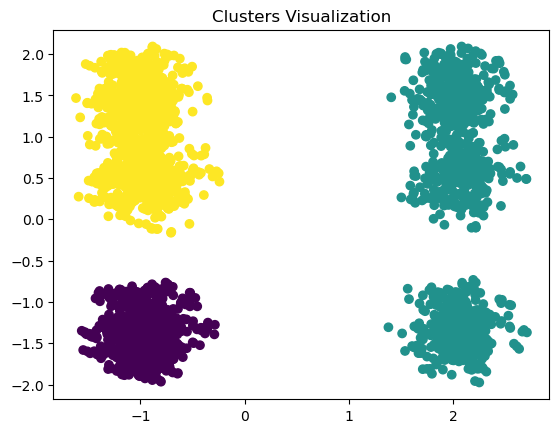

In [26]:
# Add cluster labels to the original DataFrame
df['cluster'] = clusters

# Visualize clusters using PCA (for example)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_scaled)

# Plot clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualization')
plt.show()

Distinct Clusters: The plot clearly shows four distinct clusters, indicating that your customer base can be divided into four main segments.
Cluster Separation: The clusters are well-separated, suggesting that the segmentation is meaningful and the algorithm has effectively captured underlying patterns in the data.
Cluster Shapes: The shape and density of each cluster can provide additional information about the customer segments. For example, a circular cluster might indicate customers with similar characteristics, while an elongated cluster could suggest a gradient in certain features.

-- To understand the relationship between features and customer segments, you'll need to analyze the original data:

Calculate Cluster Means: Compute the mean value of each feature for each cluster. This will give you a general idea of the characteristics of customers in each segment.
Feature Importance: Use techniques like feature importance from decision trees or random forests to identify the features that contribute most to the clustering.
Domain Knowledge: Leverage your understanding of the business and customer data to interpret the cluster characteristics.

In [31]:

numerical_features = ['age', 'Previous Purchases', 'Purchase Amount (USD)'] 
categorical_features=['gender', 'category', 'location', 'Payment Method']
# Calculate descriptive statistics for numerical features
cluster_stats = df.groupby('cluster')[numerical_features].describe()

# Calculate mode for categorical features
cluster_modes = df.groupby('cluster')[categorical_features].agg(lambda x: x.value_counts().index[0])

# Combine descriptive statistics and modes
cluster_profiles = pd.concat([cluster_stats, cluster_modes], axis=1)



In [65]:
# Count occurrences of each cluster value
cluster_counts = df['cluster'].value_counts()

cluster_counts

cluster
2    1471
1    1248
0    1181
Name: count, dtype: int64

In [29]:
cluster_stats

age                                                      \
          count       mean        std   min   25%   50%   75%   max   
cluster                                                               
0        1181.0  43.859441  15.647620  18.0  30.0  43.0  58.0  70.0   
1        1248.0  44.007212  14.953843  18.0  31.0  44.0  57.0  70.0   
2        1471.0  44.288239  15.069584  18.0  31.0  44.0  57.0  70.0   

        Previous Purchases             ...             Purchase Amount (USD)  \
                     count       mean  ...   75%   max                 count   
cluster                                ...                                     
0                   1181.0  25.412362  ...  37.0  50.0                1181.0   
1                   1248.0  24.596154  ...  37.0  50.0                1248.0   
2                   1471.0  25.943576  ...  38.5  50.0                1471.0   

                                                              
              mean        std   min   25%   50%   75%    max  
cluster                                                       
0        59.803556  23.987398  20.0  38.0  60.0  81.0  100.0  
1        60.249199  23.420556  20.0  40.0  60.0  81.0  100.0  
2        59.321550  23.672552  20.0  38.5  59.0  80.0  100.0  

[3 rows x 24 columns]

In [30]:
cluster_modes

,gender,category,location,Payment Method
cluster,,,,
0,Male,Clothing,Louisiana,Cash
1,Female,Clothing,Montana,Credit Card
2,Male,Accessories,New Mexico,PayPal


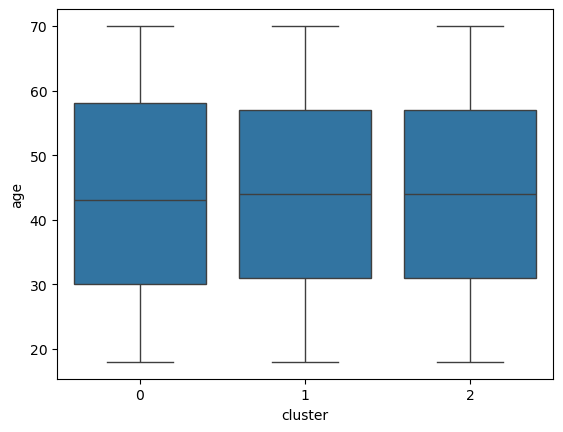

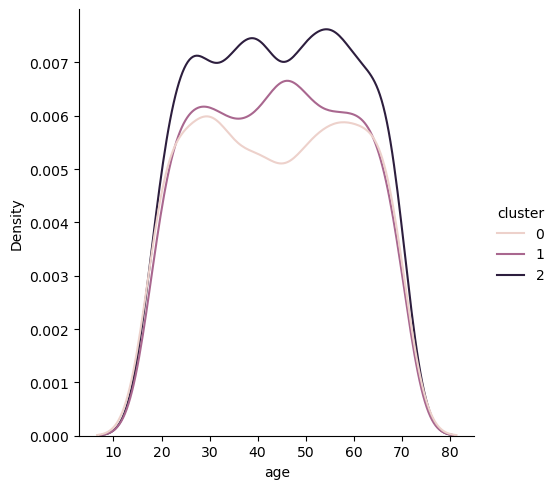

In [71]:
# Box plots
sns.boxplot(x='cluster', y='age', data=df)
plt.show()

sns.displot(data=df, x='age', hue='cluster', kind='kde')
plt.show()

In [83]:
# Create separate DataFrames for each cluster
df_clustercategory_0 = df[df['cluster'] == 0]
df_clustercategory_1 = df[df['cluster'] == 1]
df_clustercategory_2 = df[df['cluster'] == 2]


In [81]:
category_counts = df_clustercategory_0['category'].value_counts()

# Convert to DataFrame for potential further operations
category_counts_df = category_counts.to_frame(name='count')

print(category_counts_df)

             count
category          
Clothing      1181
Accessories      0
Footwear         0
Outerwear        0


In [80]:
df_clustercategory_1
category_counts = df_clustercategory_1['category'].value_counts()

# Convert to DataFrame for potential further operations
category_counts_df = category_counts.to_frame(name='count')

print(category_counts_df)

             count
category          
Clothing       556
Accessories    392
Footwear       199
Outerwear      101


In [82]:
df_clustercategory_2
category_counts = df_clustercategory_2['category'].value_counts()

# Convert to DataFrame for potential further operations
category_counts_df = category_counts.to_frame(name='count')

print(category_counts_df)

             count
category          
Accessories    848
Footwear       400
Outerwear      223
Clothing         0


In [34]:
#Analyzes location distribution within clusters.

def analyze_location_distribution(df, cluster, location):

  location_counts = df.groupby([cluster, location]).size().reset_index(name='count')
  location_counts = location_counts.sort_values(['cluster', 'count'], ascending=False)
  return location_counts

# Example usage:
location_distribution = analyze_location_distribution(df, 'cluster', 'location')
location_distribution

C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\3337688673.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_counts = df.groupby([cluster, location]).size().reset_index(name='count')


,cluster,location,count
130,2,New Mexico,41
126,2,Nebraska,40
104,2,California,38
111,2,Idaho,36
133,2,North Dakota,36
...,...,...,...
2,0,Arizona,18
26,0,Nebraska,18
34,0,Ohio,18
29,0,New Jersey,17


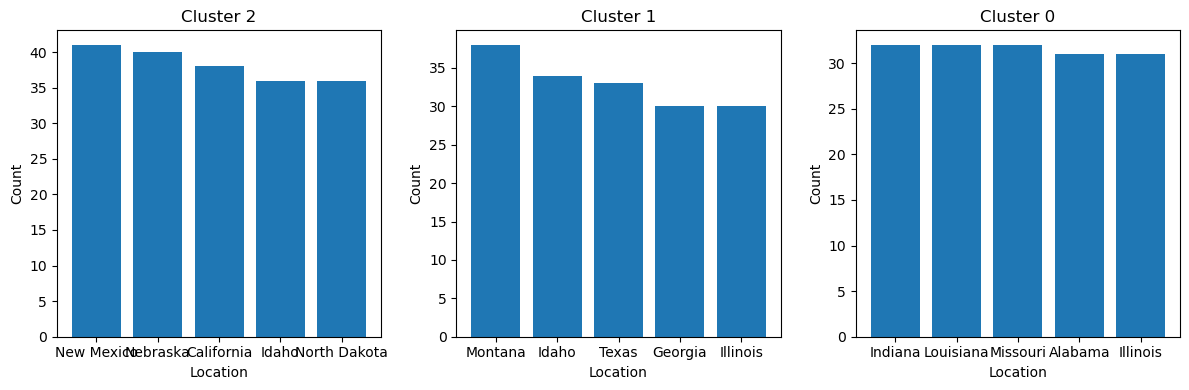

In [35]:
# Plot bar charts for top 5 locations in each cluster
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Create a figure with 3 subplots

for cluster, ax in zip(location_distribution['cluster'].unique(), axes.flat):
  cluster_data = location_distribution[location_distribution['cluster'] == cluster]
  top_5_locations = cluster_data.nlargest(5, 'count')
  ax.bar(top_5_locations['location'], top_5_locations['count'])
  ax.set_title(f"Cluster {cluster}")
  ax.set_xlabel("Location")
  ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

In [43]:
# Count occurrences of gender within each cluster
gender_counts = df.groupby(['cluster', 'gender']).size().reset_index(name='count')

# Pivot the data for a clearer view
gender_counts_pivot = gender_counts.pivot_table(index='cluster', columns='gender', values='count', fill_value=0)

gender_counts_pivot

C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\1968132003.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = df.groupby(['cluster', 'gender']).size().reset_index(name='count')
C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\1968132003.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  gender_counts_pivot = gender_counts.pivot_table(index='cluster', columns='gender', values='count', fill_value=0)


gender,Female,Male
cluster,,
0,0.0,1181.0
1,1248.0,0.0
2,0.0,1471.0


C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\3678183811.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = df.groupby([cluster, gender]).size().unstack()


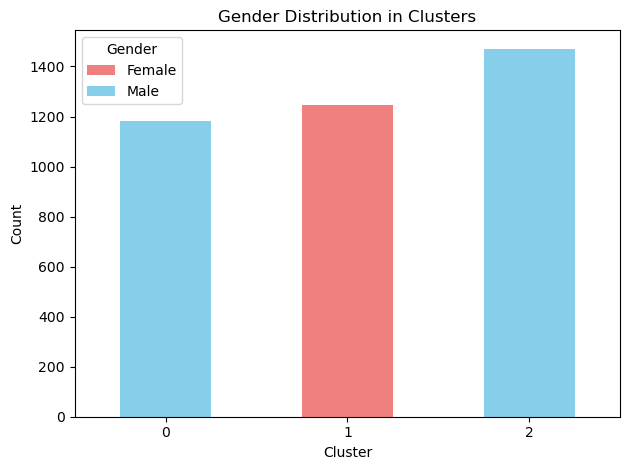

In [36]:
#Plots the distribution of gender within each cluster.

def plot_gender_distribution(df, cluster, gender):


  gender_counts = df.groupby([cluster, gender]).size().unstack()
  gender_counts.plot(kind='bar', stacked=True, color=['lightcoral','skyblue'])
  plt.xlabel("Cluster")
  plt.ylabel("Count")
  plt.title("Gender Distribution in Clusters")
  plt.legend(title="Gender")
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.show()

# Plot gender distribution
plot_gender_distribution(df.copy(), 'cluster', 'gender')

In [61]:
# Group by cluster and count payment methods
grouped = df.groupby(['cluster', 'Payment Method']).size().reset_index(name='count')

# Create separate DataFrames for each cluster
cluster_dfs = {}
for cluster, group in grouped.groupby('cluster'):
    cluster_dfs[cluster] = group.sort_values('count', ascending=False)

# Access individual DataFrames
df_cluster_0 = cluster_dfs[0]
df_cluster_1 = cluster_dfs[1]
df_cluster_2 = cluster_dfs[2]

print(df_cluster_0)
print(df_cluster_1)
print(df_cluster_2)

   cluster Payment Method  count
1        0           Cash    208
2        0    Credit Card    207
3        0     Debit Card    201
0        0  Bank Transfer    193
4        0         PayPal    192
5        0          Venmo    180
    cluster Payment Method  count
8         1    Credit Card    223
10        1         PayPal    221
7         1           Cash    212
11        1          Venmo    208
6         1  Bank Transfer    203
9         1     Debit Card    181
    cluster Payment Method  count
16        2         PayPal    264
15        2     Debit Card    254
13        2           Cash    250
17        2          Venmo    246
14        2    Credit Card    241
12        2  Bank Transfer    216


C:\Users\Karen\AppData\Local\Temp\ipykernel_25368\2843490986.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['cluster', 'Payment Method']).size().reset_index(name='count')


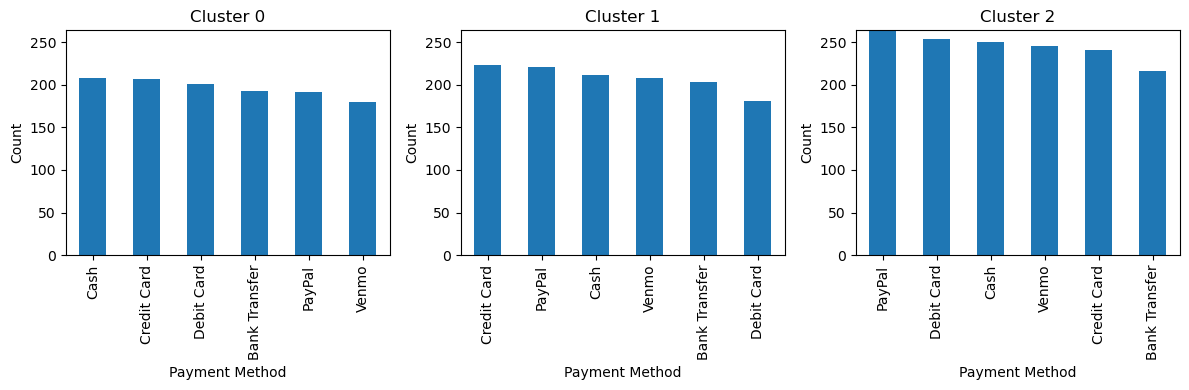

In [64]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Set y-axis limits for all plots
y_max = max(df_cluster_0['count'].max(), df_cluster_1['count'].max(), df_cluster_2['count'].max())

# Plot for Cluster 0
df_cluster_0.plot(kind='bar', x='Payment Method', y='count', ax=axes[0], legend=False, ylim=(0, y_max))
axes[0].set_title('Cluster 0')
axes[0].set_xlabel('Payment Method')
axes[0].set_ylabel('Count')

# Plot for Cluster 1
df_cluster_1.plot(kind='bar', x='Payment Method', y='count', ax=axes[1], legend=False, ylim=(0, y_max))
axes[1].set_title('Cluster 1')
axes[1].set_xlabel('Payment Method')
axes[1].set_ylabel('Count')

# Plot for Cluster 2
df_cluster_2.plot(kind='bar', x='Payment Method', y='count', ax=axes[2], legend=False, ylim=(0, y_max))
axes[2].set_title('Cluster 2')
axes[2].set_xlabel('Payment Method')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()